In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data discovery

In [3]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are no null values

In [17]:
cat = df.select_dtypes(include= 'object')
cat

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [18]:
# fields['gender'].unique()

for col in cat.columns:
    print(f'{col} : {cat[col].unique()}')

gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test_preparation_course : ['none' 'completed']


Let's encode above values so that we will have all the numeric values.

* gender: { 'male' : 0, 'female': 1}
* race_ethnicity: { 'group A': 0,  'group B': 1, 'group C': 2, 'group D': 3, 'group E' : 4}
* parental_level_of_education : {'high school' : 0, 'some high school': 0, 'some college': 1, "associate's degree" : 2, "bachelor's degree": 3, "master's degree": 4}
* lunch: {'standard' : 0, 'free/reduced' : 1}
* test_preparation_course: {'none': 0, 'completed': 1}

# Data Transformation

In [21]:
df['gender'].replace({'male' : 0, 'female': 1}, inplace= True)
df['race_ethnicity'].replace({'group A': 0,  'group B': 1, 'group C': 2, 'group D': 3, 'group E' : 4}, inplace= True)
df['parental_level_of_education'].replace({'high school' : 0, 'some high school': 0, 'some college': 1, "associate's degree" : 2, "bachelor's degree": 3, "master's degree": 4}, inplace= True)
df['lunch'].replace({'standard' : 0, 'free/reduced' : 1}, inplace= True)
df['test_preparation_course'].replace({'none': 0, 'completed': 1}, inplace= True)

/tmp/ipykernel_33/3359013350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'male' : 0, 'female': 1}, inplace= True)
/tmp/ipykernel_33/3359013350.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['race_ethnicity'].replace({'group A': 0,  'group B': 1, 'group C': 2, 'group D': 3, 'group E' : 4}, inplace= True)
/tmp/ipykernel_33/3359013350.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.in

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,3,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,4,0,0,90,95,93
3,0,0,2,1,0,47,57,44
4,0,2,1,0,0,76,78,75


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.518,0.499926,0.0,0.00,1.0,1.0,1.0
race_ethnicity,1000.0,2.174,1.157179,0.0,1.00,2.0,3.0,4.0
parental_level_of_education,1000.0,1.260,1.238521,0.0,0.00,1.0,2.0,4.0
lunch,1000.0,0.355,0.478753,0.0,0.00,0.0,1.0,1.0
test_preparation_course,1000.0,0.358,0.479652,0.0,0.00,0.0,1.0,1.0
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Seems like there are no distinct outlier in the data and now that we have all the data in numeric format, we can go ahead and test different hypothesis.

# Data Visualization for Statistical Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


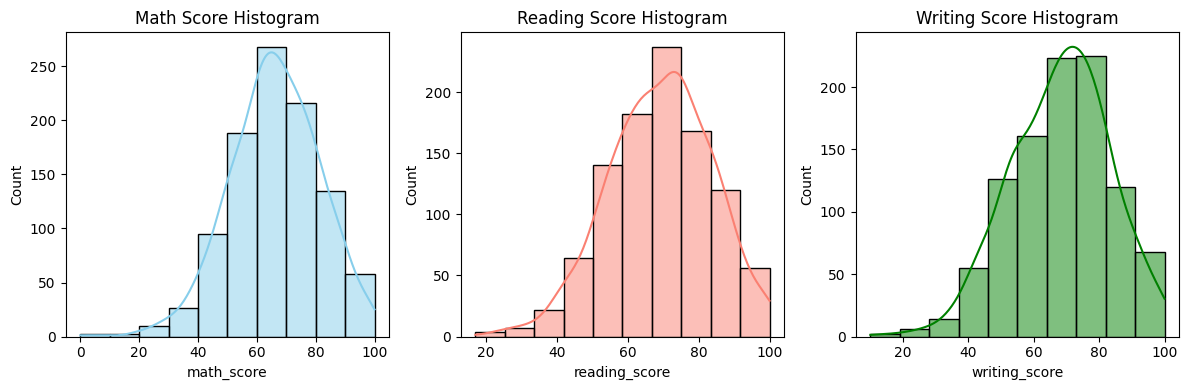

In [28]:
plt.figure(figsize=(12, 4))

# Plot histogram for math_score
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='math_score', kde=True, color='skyblue', bins=10)
plt.title('Math Score Histogram')

# Plot histogram for reading_score
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='reading_score', kde=True, color='salmon', bins=10)
plt.title('Reading Score Histogram')

# Plot histogram for writing_score
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='writing_score', kde=True, color='green', bins=10)
plt.title('Writing Score Histogram')

# Show the plots
plt.tight_layout()
plt.show()

Data visually seems normally distributed, But I want to test it using qq plots as well.

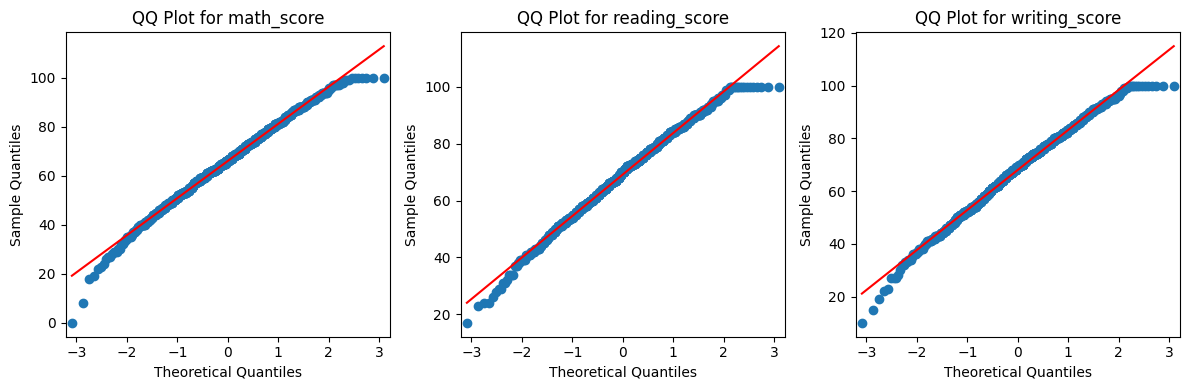

In [31]:
import statsmodels.api as sm

plt.figure(figsize=(12, 4))

for i, column in enumerate(['math_score', 'reading_score', 'writing_score'], start=1):
    plt.subplot(1, 3, i)
    sm.qqplot(df[column], line='s', ax=plt.gca())  # Pass the current axis to plot
    plt.title(f'QQ Plot for {column}')

plt.tight_layout()
plt.show()

Now we are assured that these test scores are normally distributed.

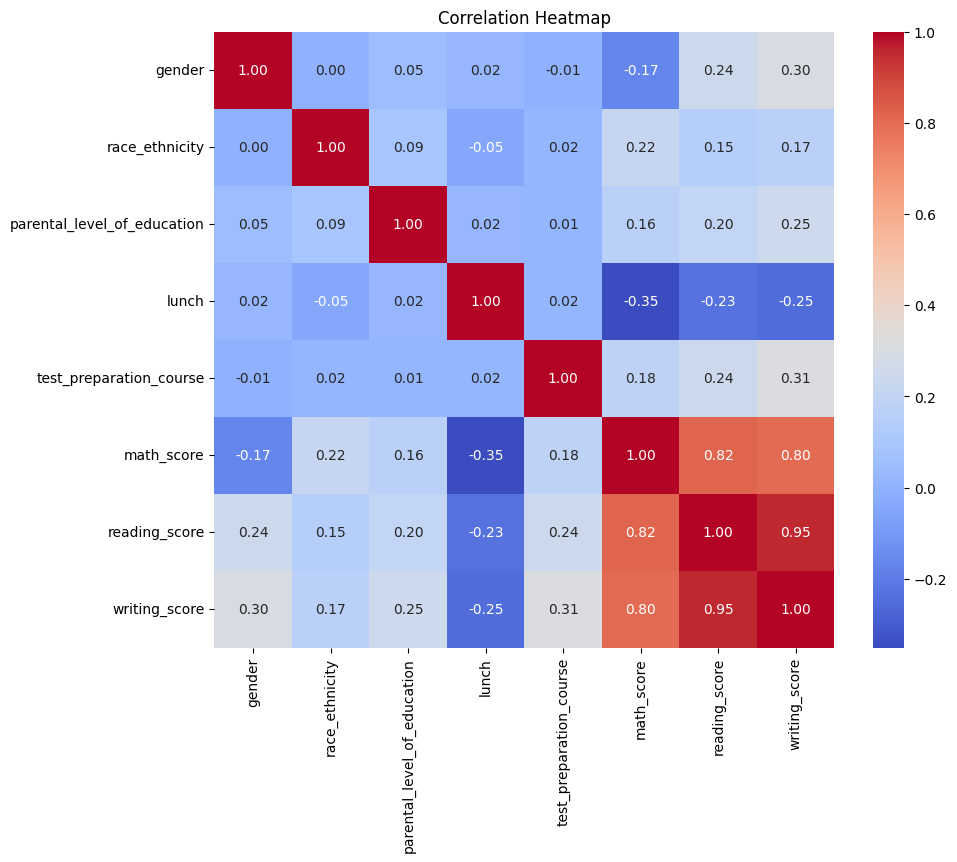

In [32]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Testing some Hypothesis

## Effect of Test Course Work Completion on scores

* Null Hypothesis (H0): There is no difference in the mean scores between students who completed the test preparation course and those who did not.
* Alternative Hypothesis (H1): There is a difference in the mean scores between the two groups.

In [43]:
# Separate data into two groups
preparation_completed = df[df['test_preparation_course'] == 1]['math_score']
preparation_not_completed = df[df['test_preparation_course'] == 0]['math_score']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(preparation_completed, preparation_not_completed)

# Print results
print('Independent Samples t-test:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in scores between students who completed the test preparation course and those who did not.')
else:
    print('There is no significant difference in scores between the two groups.')

Independent Samples t-test:
T-statistic: 5.704616417349102
P-value: 1.5359134607147415e-08
There is a significant difference in scores between students who completed the test preparation course and those who did not.


## Effect of Parent's education on Performance

* Null Hypothesis (H0): There is no significant difference in the means of math, reading, and writing scores across different levels of parental education.
* Alternative Hypothesis (H1): There is a significant difference in the means of math, reading, and writing scores across different levels of parental education.

In [45]:
# Perform ANOVA test for math scores by parental education
model_math = ols('math_score ~ C(parental_level_of_education)', data=df).fit()
anova_table_math = sm.stats.anova_lm(model_math, typ=2)
print('ANOVA test for math scores:')
print(anova_table_math)

# Perform ANOVA test for reading scores by parental education
model_reading = ols('reading_score ~ C(parental_level_of_education)', data=df).fit()
anova_table_reading = sm.stats.anova_lm(model_reading, typ=2)
print('\nANOVA test for reading scores:')
print(anova_table_reading)

# Perform ANOVA test for writing scores by parental education
model_writing = ols('writing_score ~ C(parental_level_of_education)', data=df).fit()
anova_table_writing = sm.stats.anova_lm(model_writing, typ=2)
print('\nANOVA test for writing scores:')
print(anova_table_writing)

# Define significance level
alpha = 0.05

# Interpret ANOVA results for math scores
if anova_table_math['PR(>F)'].min() < alpha:
    print('There is a significant difference in math scores across different levels of parental education.')
    # Perform post-hoc tests if necessary
else:
    print('There is no significant difference in math scores across different levels of parental education.')

# Interpret ANOVA results for reading scores
if anova_table_reading['PR(>F)'].min() < alpha:
    print('There is a significant difference in reading scores across different levels of parental education.')
    # Perform post-hoc tests if necessary
else:
    print('There is no significant difference in reading scores across different levels of parental education.')

# Interpret ANOVA results for writing scores
if anova_table_writing['PR(>F)'].min() < alpha:
    print('There is a significant difference in writing scores across different levels of parental education.')
    # Perform post-hoc tests if necessary
else:
    print('There is no significant difference in writing scores across different levels of parental education.')


ANOVA test for math scores:
                                       sum_sq     df         F    PR(>F)
C(parental_level_of_education)    7122.657713    4.0  7.960595  0.000003
Residual                        222566.421287  995.0       NaN       NaN

ANOVA test for reading scores:
                                       sum_sq     df          F        PR(>F)
C(parental_level_of_education)    9039.376617    4.0  11.026978  9.398322e-09
Residual                        203913.062383  995.0        NaN           NaN

ANOVA test for writing scores:
                                       sum_sq     df          F        PR(>F)
C(parental_level_of_education)   15066.547724    4.0  17.382285  8.532296e-14
Residual                        215610.536276  995.0        NaN           NaN
There is a significant difference in math scores across different levels of parental education.
There is a significant difference in reading scores across different levels of parental education.
There is a significant dif

## Effect of Lunch_type on Performance

In [46]:
from scipy.stats import ttest_ind

# Separate math scores for each lunch category
math_score_standard = df[df['lunch'] == 0]['math_score']
math_score_free_reduced = df[df['lunch'] == 1]['math_score']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(math_score_standard, math_score_free_reduced)

# Print results
print('Independent Samples t-test:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('The difference in math scores between lunch categories is statistically significant.')
else:

    print('There is no significant difference in math scores between lunch categories.')

Independent Samples t-test:
T-statistic: 11.837180472914612
P-value: 2.4131955993137074e-30
The difference in math scores between lunch categories is statistically significant.
